<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Tests</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h3>Abgabetermin</h3>
    <p>Die Abgabe der Hausaufgabe ist immer Dienstags um <strong>12:00 Uhr mittags</strong>! Vergessen Sie nicht Ihre Übung abzugeben.</p>
    <h2>Viel Erfolg!</h2>   
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Sie müssen nicht runden. Wir testen ob Ihr Ergebnis um maximal $5\%$ vom exaktem Wert abweicht. $f_{rel }= \frac{|x_{exakt} - x_{Studi}|}{x_{exakt}} \leq 0.05$</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Benutzen Sie nur die in der nächsten Zelle angegebenen Bibliotheken mit den dort benutzten Namen. Wenn Sie also etwas aus der Bibliothek <i>random</i> nutzen wollen, verwenden Sie den Namen <i>rd</i>.</li>
        <li>Das Ergebnis einer Funktion muss mittels <i>return</i> zurückgegeben werden. Ein <i>print</i> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart & Run All. Damit führen Sie das Notebook von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die Zeilen <i>raise NotImplementedError()</i> wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
    <h3>Plots</h3>
    <ul>
        <li>Jeder Plot soll eine Achsenbeschriftung, einen Titel, eine Legende und ein Grid haben.</li>
    </ul>
    
</div>

In [2]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats


# Gummibärchen [30 Punkte]

Sie essen gerne Gummibärchen. In einer Packung gibt es die Sorten Ananas, Himbeer, Apfel, Erdbeer, Orange und Zitrone. Jede Packung enthält ungefähr 150 Gummibärchen.

Wir interessieren uns für die Verteilung der Sorten (bspw. ob eine Sorte öfter vorkommt) und wollen diese mit einem $\chi^2$-Test überprüfen.

Dazu kaufen wir 5 Packungen Gummibärchen mit insgesamt 750 Gummibärchen.

Nach dem Zählen der Gummibärchen ergibt sich folgende Häufigkeitsverteilung:

| Farbe  | Ananas | Himbeer | Apfel | Erdbeere | Orange | Zitrone |
|--------|-----|------|------|------|--------|-------|
| Anzahl | 135  | 114   | 130  | 141  | 105    | 125    |

### Gummibärchen a) [5 Punkte]

Stellen Sie die H0-Hypothese auf.

(H0)Die Verteilung der unterschiedlichen Sorten ist gleich häufig.
(H1)Die Verteilung der unterschiedlichen Sorten  ist unterschiedlich , eine Sorte kann öfter als eine andere vorkommen.

### Gummibärchen b) [5 Punkte]

Erstellen Sie zuerst einen pandas DataFrame mit den Spalten Sorte, Beobachtet, Erwartet.

- Die Spalte Sorte enthalte den Namen der Sorte
- Die Spalte Beobachtet enthalte die beobachtete Häufigkeit (s. Tabelle oben)
- Die Spalte Erwartet enthalte die erwartete Häufigkeit für die H0 Hypothese

Nennen Sie Ihren DataFrame ```gummibaerchen```

In [3]:
import pandas as pd

#erstellen des DataFrames
sorte = ['Ananas', 'Himbeer','Apfel','Erdbeere','Orange','Zitrone']
beobachtet =   [135,114,130,141,105,125]

#die Erwarteten Werte berechnen
h0_beobachtet = (sum(beobachtet)/len(beobachtet))
erwartet =[]
for i in range(0, len(sorte)):
    erwartet.append(h0_beobachtet)


d= {'Sorte':sorte,
    'Beobachtet':beobachtet,
    'Erwartet':h0_beobachtet}


gummibaerchen = pd.DataFrame(data=d)

gummibaerchen

,Sorte,Beobachtet,Erwartet
0,Ananas,135,125.0
1,Himbeer,114,125.0
2,Apfel,130,125.0
3,Erdbeere,141,125.0
4,Orange,105,125.0
5,Zitrone,125,125.0


### Gummibärchen c) [5 Punkte]

Rechnen Sie die Prüfgröße $\chi^2$ für den Test aus. Speichern Sie Ihre Lösung in der Variablen chi.

In [4]:
chi = 0

#erste Möglichkeit zur Berechnung : 

#data = gummibaerchen.Beobachtet
#a = stats.chisquare(data)
#chi1 =a[0]

#zweite Möglichkeit zur Berechnung : 

beob_häuf = gummibaerchen.Beobachtet
erw_häuf= gummibaerchen.Erwartet

chi= sum((beob_häuf-erw_häuf)**2 /(erw_häuf))


# empirischer chi^2 wert
chi

7.216

### Gummibärchen d) [5 Punkte]

Benutzen Sie den $\chi^2$ Test mit einem Signifikanzniveau von $\alpha = 1 \%$ um die Hypothese anzunehmen oder abzulehnen.

Berechnen Sie die untere und obere Grenze für den Annahmebereich der H0 Hypothese.

Speichern Sie Ihre Lösung in den Variablen untereGrenze und obereGrenze.

Nehmen Sie die H0 Hypothese an? Speichern Sie Ihre Lösung als Boolean (True, False) in der Variablen ```h0angenommen```.


In [5]:
alpha = 0.01
untereGrenze = 0
obereGrenze = 0
h0angenommen = False

# df = Anzahl elemente - 1 
# df = 5

#berechnung der unteren Grenze
untereGrenze = stats.chi2.ppf(q=alpha, df=5)
#berechnung der oberen Grenze
obereGrenze =  stats.chi2.ppf(q=(1-alpha), df=5)
#h0angenommen wird als Boolean bestimmt:
h0angenommen = untereGrenze <= chi <= obereGrenze
#wenn chi wert zwischen den Grenzen liegt wird die Hypothese angenommen

print('Die Grenzen für den Annahmebereich sind ({:.2f}, {:.2f})'.format(untereGrenze, obereGrenze))
if h0angenommen:
    print('Die H0 Hypothese wird angenommen')
else:
    print('Die H0 Hypothese wird abgelehnt')

Die Grenzen für den Annahmebereich sind (0.55, 15.09)
Die H0 Hypothese wird angenommen


In [6]:
# Dies ist eine Testzelle, bitte ignorieren Sie diese

### Gummibärchen e) [10 Punkte]

Erstellen Sie einen Plot für die Dichtefunktion der $\chi^2$ Verteilung in den Grenzen von 0 bis 20.

Zeichnen Sie die untere Grenze des Annahmebereichs und die obere Grenze des Annahmebereichs als vertikale Linie ein.

Zeichnen Sie eine vertikale Linie für die Prüfgröße.

Stellen Sie sicher, das der Wert der oberen und unteren, sowie der Prüfgröße im Plot ablesbar ist (siehe ```plt.xticks```).


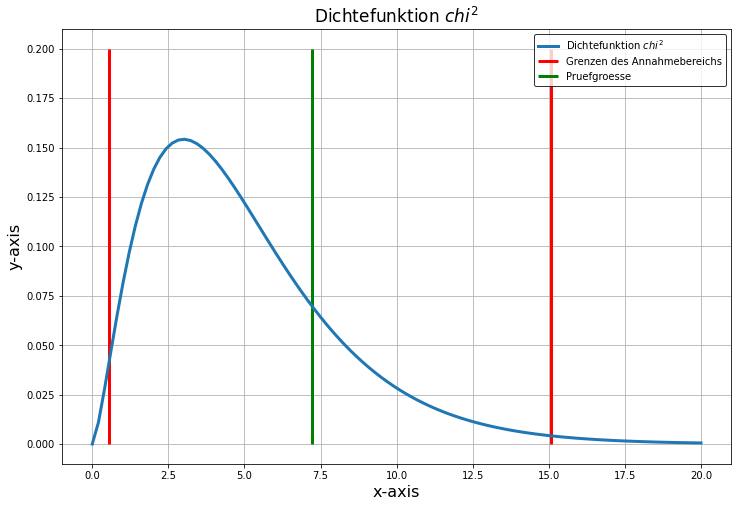

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2


# np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
x= np.linspace(0,20,100)
# chi2.pdf(x, df, loc, scale) 
y= chi2.pdf(x,5)

#Eingabe für die Grenzen
y_min =[0.0,0.0]
y_max = [0.20,0.20]
grenzen= [untereGrenze,obereGrenze]

#eingabe für die Prüfgroesse
plt.figure(figsize=(12,8))
plt.plot(x,y, label='Dichtefunktion $chi^2$',linewidth=3)

#Grenzen des Annahmebereichs
plt.vlines(grenzen,y_min,y_max, colors='r', linestyles='solid', label='Grenzen des Annahmebereichs',linewidth=3)
#Pruefgroesse
plt.vlines(chi,y_min[0],y_max[0], colors='g', linestyles='solid', label='Pruefgroesse',linewidth=3)


#plotten des Graphen  
plt.title('Dichtefunktion $chi^2$' , fontsize=17)
plt.xlabel('x-axis', fontsize=16, color='k')
plt.ylabel('y-axis', fontsize=16, color='k')
plt.legend( loc='best', edgecolor='k')
plt.grid(True)
plt.show()


# Krankheit [30 Punkte]

Ein Wissenschaftler hat verschiedene Maßnahmen gegen eine Krankheit getestet und möchte deren Wirksamkeit nun statistisch belegen.


### Krankheit a) [30 Punkte]

Implementieren Sie die Funktion ```kontingenztafel_test```, die eine Kontingenztafel erhält (bspw. Vierfeldertafel) und den Chi-Quadrat Test durchführt.

Die Funktion soll die Prüfgröße, die Anzahl der Freiheitsgerade, sowie den p-Wert zurückgeben.

Für die Anwendbarkeit des Chi-Quadrat Tests gibt es eine Faustformel. Sollte die Anwendbarkeit des Tests nicht gegeben sein, geben Sie zusätzlich eine Warnung aus. Dies können Sie mit dem Befehl ```print('Dies ist meine Warnung!')``` machen (ändern Sie den Text). 

In [8]:
from typing import Tuple
import numpy as np
from scipy.stats import chisquare, chi2

#stats.chisquare(f_obs=observed, f_exp=expected)
#pruefgroesse,p_Wert= stats.chisquare(kontingenztafel, f_exp=[], ddof=freiheitsgrade)

def kontingenztafel_test(kontingenztafel: [[float]]) -> Tuple[float, float, float]:
    '''
    Führe einen Chi-Quadrat-Test mit der Kontingenztafel durch
    
    Arguments:
        kontingenztafel -- Die Kontingenztafel (bspw. Vierfeldertafel)
    Returns:
        pruefgroesse    -- Die Prüfgröße des Chi-Quadrat-Tests
        freiheitsgrade  -- Die Anzahl der Freiheitsgrade
        p_Wert          -- Der aus dem Chi-Quadrat-Test ermittelte p-Wert
    '''
    pruefgroesse = 0
    p_Wert = 0
    freiheitsgrade = 0

    z1= (kontingenztafel[0])
    z2= (kontingenztafel[1])
    sum_ges=sum(z1+z2)

    a= z1[0]
    b= z1[1]
    c= z2[0]
    d= z2[1]
    
    anteile= [[a/sum_ges,b/sum_ges],
             [c/sum_ges,d/sum_ges]]
    
    sum_z1=sum(anteile[0])
    sum_z2=sum(anteile[1])
    sum_s1=(anteile[0][0]+anteile[1][0])
    sum_s2=(anteile[0][1]+anteile[1][1])
    
    #Erwartete absolute Werte
    abs_erw=[[(sum_s1*sum_z1)*sum_ges,(sum_s2*sum_z1)*sum_ges],
                [(sum_s1*sum_z2)*sum_ges,(sum_s2*sum_z2)*sum_ges]]
    
    #Warnung wenn die Anwendbarkeit des Testes nicht gegeben ist
    for arr in abs_erw:
        for i in arr:
            if(i<5):
                print('chi^2 nicht anwendbar, da nicht alle Erwartungswerte > 5 sind !!')
    
    #erstellen df aus den beobachteten und erwarteten Daten
    b=[a,b,c,d]
    e=[abs_erw[0][0],abs_erw[0][1],abs_erw[1][0],abs_erw[1][1]]
    d={'Beobachtet':b,
        'Erwartet':e}
    g=pd.DataFrame(data=d)
    
    #berechnung pruefgroesse
    pruefgroesse= sum((g.Beobachtet-g.Erwartet)**2 /(g.Erwartet))
    #berechnung freiheitsgrade
    freiheitsgrade = (len(kontingenztafel)-1) * (len(kontingenztafel[1])-1)
    #berechnung p 
    p_Wert = 1-stats.chi2.cdf(pruefgroesse, freiheitsgrade)
    
    # Tupel mit pruefgroesse, freiheitsgrade, p_Wert wird zurückgegeben
    x=(pruefgroesse, freiheitsgrade, p_Wert)

    return x
    

# Aufruf mit Beispiel aus der Vorlesung
pruefgroesse, freihheitsgrade, p_Wert = kontingenztafel_test([[17, 38], [18, 7]])

print(pruefgroesse, freihheitsgrade, p_Wert)

11.792438672438672 1 0.0005947177851116647



# Exakter Test nach Fisher [30 Punkte]

Der Fisher-Test ist ein Signifikanztest auf Unabhängigkeit in Kontingenztafeln.


### Exakter Test nach Fisher a)

Implementieren Sie den zweiseitigen Fisher-Test. Benutzen Sie hierfür nicht die Funktion ```stats.fisher_exact```!

Die Funktion ```fisher_exakt``` erhält eine Vierfeldertafel und berechnet den zugehörigen p Wert.

In [9]:
import math

def fisher_exakt(vierfeldertafel) -> float:
    '''
    Führe den zweiseitigen Fisher-Test für eine Vierfeldertafel aus
    
    Arguments:
        vierfeldertafel -- Die Vierfeldertafel
    Returns:
        p_Wert          -- Der p-Wert 
    '''
    p_Wert = 0
    
    #Fakultät berechnen
    fak = lambda x: math.factorial(x)
    
    #Funktion um p zu berechnen
    p_func= lambda a,b,c,d,n:  (fak(a+b)*fak(c+d)*fak(a+c)*fak(b+d))/(fak(n)*fak(a)*fak(b)*fak(c)*fak(d))
    
    
    z1= (vierfeldertafel[0])
    z2= (vierfeldertafel[1])
    n= sum(z1)+sum(z2)
    a= z1[0]
    b= z1[1]
    c= z2[0]
    d= z2[1]
    #p-Startwert und listen
    p_start=p_func(a,b,c,d,n)
    p_liste=[]
    p_liste1=[]
    #Vierfelder tafeln links und rechtsseitig
    tafel_start=[a,b,c,d]
    #kopieren der Ursprungstafel
    tafel_rechts=[i for i in tafel_start]
    tafel_links=[i for i in tafel_start]
   
    #Es werden alle möglichen 4 Felderverteilungen berücksichtigt
    
    #zuerst werden die Werte rechts oben und links unten erhöht , die anderen beiden dekrementiert
    while not 0 in tafel_rechts:
        tafel_rechts[0] -= 1
        tafel_rechts[1] += 1
        tafel_rechts[2] += 1
        tafel_rechts[3] -= 1
        n=sum(tafel_rechts)
        #speichern der p werte in einer Liste
        p_liste.append(p_func(tafel_rechts[0],tafel_rechts[1],tafel_rechts[2],tafel_rechts[3],n))
        n=0
    
    #im zweiten Schritt genau anders herum
    while not 0 in tafel_links:
        tafel_links[0] += 1
        tafel_links[1] -= 1
        tafel_links[2] -= 1
        tafel_links[3] += 1
        n=sum(tafel_links)
        #speichern der p werte in einer Liste
        p_liste.append(p_func(tafel_links[0],tafel_links[1],tafel_links[2],tafel_links[3],n))
        n=0

    #nur Werte die kleiner oder gleich dem Start p-Wert sind, werden aufsummiert
    for i in p_liste:
        if(i<=p_start):
            p_liste1.append(i)
    
    #der p Wert wird als Summe aller p-Werte die unter dem Startwert liegen berechnet 
    p_Wert=sum(p_liste1)+p_start

    
    
    return p_Wert

    
vierfeldertafel = [[4, 1], 
                   [2, 2]]

fisher_exakt(vierfeldertafel), stats.fisher_exact(vierfeldertafel)

(0.5238095238095238, (4.0, 0.5238095238095241))